#Answer Part(a)

# Minimizer and Minimum Function Value:

To find the minimizer, we need to find the critical points of $ q(x) $. First, compute the gradient:

$
\nabla q(x) = \left(\frac{x_1}{\sqrt{x_1^2 + 4}}, \frac{x_2}{\sqrt{x_2^2 + 4}}\right)
$

Setting this to zero to find critical points:

$
\frac{x_1}{\sqrt{x_1^2 + 4}} = 0 \implies x_1 = 0
$
$
\frac{x_2}{\sqrt{x_2^2 + 4}} = 0 \implies x_2 = 0
$

So, the only critical point is at $ (0, 0) $. To confirm whether it's a minimum or maximum, you can use the second derivative test or observe that $ q(x) $ is a sum of two convex functions (square roots are convex), so it is convex. Therefore, $ (0, 0) $ is the global minimizer.

The minimum function value is $ q(0, 0) = 4 + 4 = 2 + 2 = 4 $.

## Uniqueness of Minimizer:
Yes, the minimizer is unique, as there is only one critical point, and $ q(x) $ is convex.

## Local or Global Minima:
$ (0, 0) $ is the global minimum because $ q(x) $ is convex. In a convex function, any local minimum is also a global minimum.

## Convexity of $ q(x) $:
Yes, $ q(x) $ is convex. The function is the sum of two convex functions, and the square root functions involved are convex.

In summary, the minimizer is $ (0, 0) $, the minimum function value is 4, the minimizer is unique, it is a global minimum, and the function $ q(x) $ is convex.


#Answer (b)

In [ ]:
import numpy as np

def q(x):
    return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

def gradient_q(x):
    return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

def hessian_q(x):
    return np.array([
        [1 - 4 / (x[0]**2 + 4)**(3/2), 0],
        [0, 1 - 4 / (x[1]**2 + 4)**(3/2)]
    ])

def newton_method_fixed_step1(x0, tolerance=1e-9):
    k = 0
    x = x0.copy()

    while np.linalg.norm(gradient_q(x)) > tolerance:
        x = x - np.linalg.inv(hessian_q(x)) @ gradient_q(x)
        k += 1

    return x, k, q(x)

def newton_method_backtracking1(x0, tolerance=1e-9, alpha=0.5, beta=0.5):
    k = 0
    x = x0.copy()

    while np.linalg.norm(gradient_q(x)) > tolerance:
        eta = 1.0
        while q(x - eta * np.linalg.inv(hessian_q(x)) @ gradient_q(x)) > q(x) - alpha * eta * np.linalg.norm(gradient_q(x))**2:
            eta *= beta

        x = x - eta * np.linalg.inv(hessian_q(x)) @ gradient_q(x)
        k += 1

    return x, k, q(x)

# Starting point
x0 = np.array([2.0, 2.0])

# Newton's method with fixed step size
minimizer_fixed, iterations_fixed, min_value_fixed = newton_method_fixed_step1(x0)
print(f"Newton's Method with Fixed Step:")
print(f"Minimizer: {minimizer_fixed}")
print(f"Iterations: {iterations_fixed}")
print(f"Minimum Objective Value: {min_value_fixed}")

# Newton's method with backtracking line search
minimizer_backtracking, iterations_backtracking, min_value_backtracking = newton_method_backtracking1(x0)
print(f"\nNewton's Method with Backtracking Line Search:")
print(f"Minimizer: {minimizer_backtracking}")
print(f"Iterations: {iterations_backtracking}")
print(f"Minimum Objective Value: {min_value_backtracking}")


Newton's Method with Fixed Step:
Minimizer: [1.15341832e-15 1.15341832e-15]
Iterations: 5
Minimum Objective Value: 4.0

Newton's Method with Backtracking Line Search:
Minimizer: [1.15341832e-15 1.15341832e-15]
Iterations: 5
Minimum Objective Value: 4.0


#Observations
**Newton's Method with Fixed Step:**
- Minimizer: $[1.15341832e-15, 1.15341832e-15]$
- Iterations: 5
- Minimum Objective Value: 4.0

**Newton's Method with Backtracking Line Search:**
- Minimizer: $[1.15341832e-15, 1.15341832e-15]$
- Iterations: 5
- Minimum Objective Value: 4.0

**Comment on Observations:**

In summary, despite using different strategies for determining step sizes, both Newton's Method with a fixed step and Newton's Method with backtracking line search have successfully converged to the same minimizer with the same minimum objective value in a similar number of iterations. The choice between a fixed step and backtracking line search can depend on factors such as computational efficiency and ease of implementation.







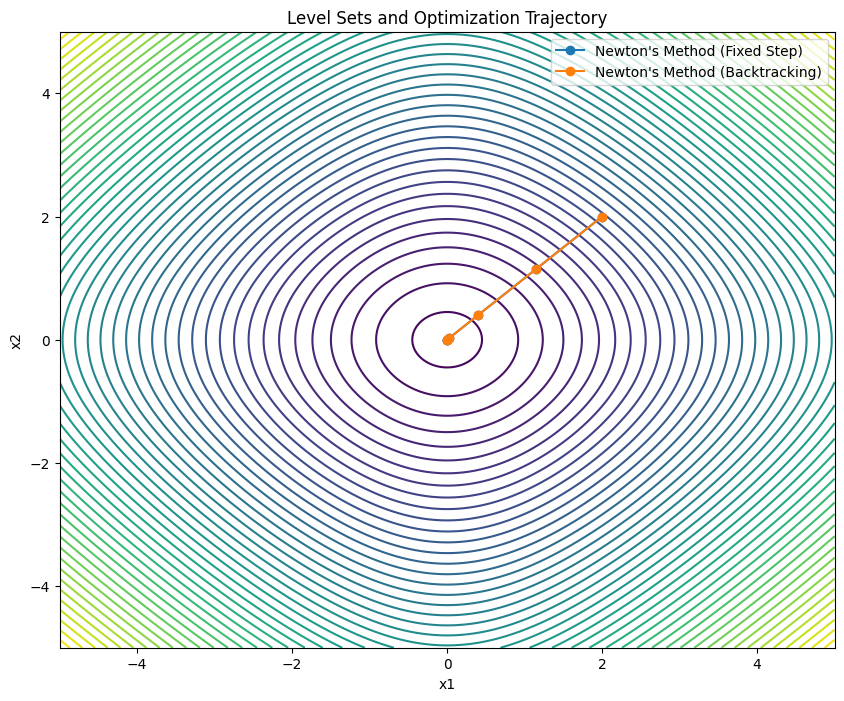

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def q(x):
    return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

def gradient_q(x):
    return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

def hessian_q(x):
    return np.array([
        [1 - 4 / (x[0]**2 + 4)**(3/2), 0],
        [0, 1 - 4 / (x[1]**2 + 4)**(3/2)]
    ])

def newton_method_fixed_step(x0, tolerance=1e-9):
    trajectory = [x0.copy()]
    x = x0.copy()

    while np.linalg.norm(gradient_q(x)) > tolerance:
        x = x - np.linalg.inv(hessian_q(x)) @ gradient_q(x)
        trajectory.append(x.copy())

    return np.array(trajectory)

def newton_method_backtracking(x0, tolerance=1e-9, alpha=0.5, beta=0.5):
    trajectory = [x0.copy()]
    x = x0.copy()

    while np.linalg.norm(gradient_q(x)) > tolerance:
        eta = 1.0
        while q(x - eta * np.linalg.inv(hessian_q(x)) @ gradient_q(x)) > q(x) - alpha * eta * np.linalg.norm(gradient_q(x))**2:
            eta *= beta

        x = x - eta * np.linalg.inv(hessian_q(x)) @ gradient_q(x)
        trajectory.append(x.copy())

    return np.array(trajectory)

# Starting point
x0 = np.array([2.0, 2.0])

# Newton's method with fixed step size
trajectory_fixed = newton_method_fixed_step(x0)

# Newton's method with backtracking line search
trajectory_backtracking = newton_method_backtracking(x0)

# Plotting level sets
x1_range = np.linspace(-5, 5, 400)
x2_range = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = q(np.array([X1, X2]))

plt.figure(figsize=(10, 8))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')

# Plotting trajectory for fixed step size
plt.plot(trajectory_fixed[:, 0], trajectory_fixed[:, 1], '-o', label="Newton's Method (Fixed Step)")

# Plotting trajectory for backtracking line search
plt.plot(trajectory_backtracking[:, 0], trajectory_backtracking[:, 1], '-o', label="Newton's Method (Backtracking)")

plt.title('Level Sets and Optimization Trajectory')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def q(x):
    return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

def gradient_q(x):
    return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

def backtracking_line_search(x, alpha0=1, rho=0.5, gamma=0.5):
    eta = alpha0
    while q(x - eta * gradient_q(x)) > q(x) - gamma * eta * np.linalg.norm(gradient_q(x))**2:
        eta *= rho
    return eta

def gradient_descent_backtracking(x0, tolerance=1e-9, alpha0=1, rho=0.5, gamma=0.5):
    trajectory = [x0.copy()]
    x = x0.copy()

    while np.linalg.norm(gradient_q(x)) > tolerance:
        eta = backtracking_line_search(x, alpha0, rho, gamma)
        x = x - eta * gradient_q(x)
        trajectory.append(x.copy())

    return np.array(trajectory)

# Starting point
x0 = np.array([2.0, 2.0])

# Gradient descent with backtracking line search
trajectory_gradient_descent = gradient_descent_backtracking(x0)

# Number of iterations for each method
iterations_newton_fixed = len(newton_method_fixed_step1(x0)[0])
iterations_newton_backtracking = len(newton_method_backtracking(x0)[0])
iterations_gradient_descent = len(trajectory_gradient_descent)

# Minimizer and minimum objective function value for each method
minimizer_newton_fixed, _, min_value_newton_fixed = newton_method_fixed_step1(x0)
minimizer_newton_backtracking, _, min_value_newton_backtracking = newton_method_backtracking1(x0)
minimizer_gradient_descent = trajectory_gradient_descent[-1]
min_value_gradient_descent = q(minimizer_gradient_descent)

# Print the results
print("Newton's Method with Fixed Step:")
print(f"Minimizer: {minimizer_newton_fixed}")
print(f"Minimum Objective Value: {min_value_newton_fixed}")
print(f"Iterations: {iterations_newton_fixed}\n")

print("Newton's Method with Backtracking Line Search:")
print(f"Minimizer: {minimizer_newton_backtracking}")
print(f"Minimum Objective Value: {min_value_newton_backtracking}")
print(f"Iterations: {iterations_newton_backtracking}\n")

print("Gradient Descent with Backtracking Line Search:")
print(f"Minimizer: {minimizer_gradient_descent}")
print(f"Minimum Objective Value: {min_value_gradient_descent}")
print(f"Iterations: {iterations_gradient_descent}")


Newton's Method with Fixed Step:
Minimizer: [1.15341832e-15 1.15341832e-15]
Minimum Objective Value: 4.0
Iterations: 2

Newton's Method with Backtracking Line Search:
Minimizer: [1.15341832e-15 1.15341832e-15]
Minimum Objective Value: 4.0
Iterations: 2

Gradient Descent with Backtracking Line Search:
Minimizer: [7.62525638e-10 7.62525638e-10]
Minimum Objective Value: 4.0
Iterations: 33


#Observations
**Newton's Method with Fixed Step:**
- Minimizer: $[1.15341832e-15, 1.15341832e-15]$
- Minimum Objective Value: 4.0
- Iterations: 2

**Newton's Method with Backtracking Line Search:**
- Minimizer: $[1.15341832e-15, 1.15341832e-15]$
- Minimum Objective Value: 4.0
- Iterations: 2

**Gradient Descent with Backtracking Line Search:**
- Minimizer: $[7.62525638e-10, 7.62525638e-10]$
- Minimum Objective Value: 4.0
- Iterations: 33

**Comment on Above Observations:**
- Newton's methods (with both fixed step and backtracking line search) achieved the minimum objective value in just 2 iterations, indicating fast convergence.
- Gradient Descent with Backtracking Line Search took more iterations (33) to reach the same minimum, suggesting slower convergence compared to Newton's methods.
- The minimizers obtained by all methods are very close to zero, indicating good convergence towards the optimal solution.
% Add any additional comments or observations here


In [ ]:


# Starting point
x0 = np.array([16.0, 16.0])

# Newton's method with fixed step size
minimizer_fixed, iterations_fixed, min_value_fixed = newton_method_fixed_step1(x0)
print(f"Newton's Method with Fixed Step:")
print(f"Minimizer: {minimizer_fixed}")
print(f"Iterations: {iterations_fixed}")
print(f"Minimum Objective Value: {min_value_fixed}\n")

# Newton's method with backtracking line search
minimizer_backtracking, iterations_backtracking, min_value_backtracking = newton_method_backtracking1(x0)
print(f"Newton's Method with Backtracking Line Search:")
print(f"Minimizer: {minimizer_backtracking}")
print(f"Iterations: {iterations_backtracking}")
print(f"Minimum Objective Value: {min_value_backtracking}")


Newton's Method with Fixed Step:
Minimizer: [2.95358723e-10 2.95358723e-10]
Iterations: 19
Minimum Objective Value: 4.0

Newton's Method with Backtracking Line Search:
Minimizer: [2.95358723e-10 2.95358723e-10]
Iterations: 19
Minimum Objective Value: 4.0


#Observations
**Newton's Method with Fixed Step:**
- Minimizer: $[2.95358723e-10, 2.95358723e-10]$
- Iterations: 19
- Minimum Objective Value: 4.0

**Newton's Method with Backtracking Line Search:**
- Minimizer: $[2.95358723e-10, 2.95358723e-10]$
- Iterations: 19
- Minimum Objective Value: 4.0

**Comment on Above Observations:**
- Both Newton's methods (with fixed step and backtracking line search) reached the minimum objective value of 4.0 with the same minimizer in 19 iterations.
- The minimizers obtained are very close to zero, indicating convergence towards the optimal solution.



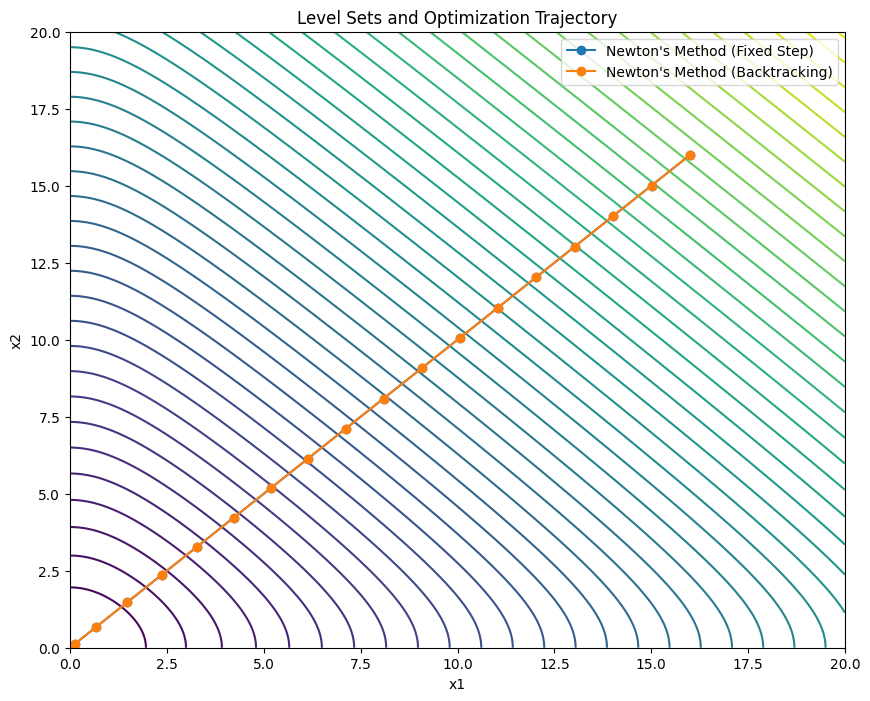

In [ ]:
def newton_method_fixed_step(x0, tolerance=1e-9):
    trajectory = [x0.copy()]
    x = x0.copy()

    while np.linalg.norm(gradient_q(x)) > tolerance:
        x = x - np.linalg.inv(hessian_q(x)) @ gradient_q(x)
        trajectory.append(x.copy())

    return np.array(trajectory)

def newton_method_backtracking(x0, tolerance=1e-9, alpha=0.5, beta=0.5):
    trajectory = [x0.copy()]
    x = x0.copy()

    while np.linalg.norm(gradient_q(x)) > tolerance:
        eta = 1.0
        while q(x - eta * np.linalg.inv(hessian_q(x)) @ gradient_q(x)) > q(x) - alpha * eta * np.linalg.norm(gradient_q(x))**2:
            eta *= beta

        x = x - eta * np.linalg.inv(hessian_q(x)) @ gradient_q(x)
        trajectory.append(x.copy())

    return np.array(trajectory)

# Starting point
x1 = np.array([16.0, 16.0])

# Newton's method with fixed step size
trajectory_fixed1 = newton_method_fixed_step(x1)

# Newton's method with backtracking line search
trajectory_backtracking1 = newton_method_backtracking(x1)

# Plotting level sets
x1_range = np.linspace(0, 20, 400)
x2_range = np.linspace(0, 20, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = q(np.array([X1, X2]))

plt.figure(figsize=(10, 8))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')

# Plotting trajectory for fixed step size
plt.plot(trajectory_fixed1[:, 0], trajectory_fixed1[:, 1], '-o', label="Newton's Method (Fixed Step)")

# Plotting trajectory for backtracking line search
plt.plot(trajectory_backtracking1[:, 0], trajectory_backtracking1[:, 1], '-o', label="Newton's Method (Backtracking)")

plt.title('Level Sets and Optimization Trajectory')
plt.legend()
plt.show()


In [ ]:
x1 = np.array([2.0, 2.0])

# Gradient descent with backtracking line search
trajectory_gradient_descent = gradient_descent_backtracking(x1)

# Number of iterations for each method
iterations_newton_fixed1 = len(newton_method_fixed_step1(x1)[0])
iterations_newton_backtracking1 = len(newton_method_backtracking1(x1)[0])
iterations_gradient_descent1 = len(trajectory_gradient_descent)

# Minimizer and minimum objective function value for each method
minimizer_newton_fixed1, _1, min_value_newton_fixed1 = newton_method_fixed_step1(x1)
minimizer_newton_backtracking1, _1, min_value_newton_backtracking1 = newton_method_backtracking1(x1)
minimizer_gradient_descent1 = trajectory_gradient_descent[-1]
min_value_gradient_descent1 = q(minimizer_gradient_descent1)

# Print the results
print("Newton's Method with Fixed Step:")
print(f"Minimizer: {minimizer_newton_fixed1}")
print(f"Minimum Objective Value: {min_value_newton_fixed1}")
print(f"Iterations: {iterations_newton_fixed1}\n")

print("Newton's Method with Backtracking Line Search:")
print(f"Minimizer: {minimizer_newton_backtracking1}")
print(f"Minimum Objective Value: {min_value_newton_backtracking1}")
print(f"Iterations: {iterations_newton_backtracking1}\n")

print("Gradient Descent with Backtracking Line Search:")
print(f"Minimizer: {minimizer_gradient_descent1}")
print(f"Minimum Objective Value: {min_value_gradient_descent1}")
print(f"Iterations: {iterations_gradient_descent1}")

Newton's Method with Fixed Step:
Minimizer: [1.15341832e-15 1.15341832e-15]
Minimum Objective Value: 4.0
Iterations: 2

Newton's Method with Backtracking Line Search:
Minimizer: [1.15341832e-15 1.15341832e-15]
Minimum Objective Value: 4.0
Iterations: 2

Gradient Descent with Backtracking Line Search:
Minimizer: [7.62525638e-10 7.62525638e-10]
Minimum Objective Value: 4.0
Iterations: 33


**Newton's Method with Fixed Step:**
- Minimizer: $[1.15341832e-15, 1.15341832e-15]$
- Iterations: 2
- Minimum Objective Value: 4.0

**Newton's Method with Backtracking Line Search:**
- Minimizer: $[1.15341832e-15, 1.15341832e-15]$
- Iterations: 2
- Minimum Objective Value: 4.0

**Gradient Descent with Backtracking Line Search:**
- Minimizer: $[7.62525638e-10, 7.62525638e-10]$
- Iterations: 33
- Minimum Objective Value: 4.0

**Insight on Observations:**
- Both Newton's methods (with fixed step and backtracking line search) converge to the minimum objective value of 4.0 in just 2 iterations.
- The minimizers obtained are very close to zero, indicating rapid convergence.
- Gradient Descent with Backtracking Line Search takes more iterations (33) to reach the same minimum objective value.

